# Análise Exploratória de Dados 



## 1 - Introdução

O presente relatório visa apresentar a análise exploratória de dados realizada para entender e extrair insights do conjunto de dados fornecido, que consiste em informações relevantes sobre aluguéis temporários na cidade de Nova York. Este trabalho é parte de um projeto mais amplo, focando especialmente na estratégia de precificação.

## 2 - Razão para a Análise e Perguntas de Negócio:

A análise exploratória de dados é uma etapa fundamental para compreender a estrutura e os padrões subjacentes nos dados, visando extrair insights que possam orientar estratégias de negócio. Neste contexto, o objetivo é desenvolver um modelo de previsão de preços com base nos dados disponíveis. Para isso,além do modelo de previsão é importante responder às seguintes perguntas de negócio:

a.	Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

b.	O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

c. Modelos para previsão do preço.

## 3 - Bibliotecas Utilizadas

Para realizar essa análise, foram utilizadas as seguintes bibliotecas em Python:

- Pandas: Para manipulação e análise de dados tabulares.

- Numpy: Para operações numéricas eficientes.

- Matplotlib.pyplot: Para visualização de dados e criação de gráficos.

- Seaborn: Para aprimorar a visualização e interpretação dos padrões nos dados.

- Scipy.stats: Para análises estatísticas adicionais, se necessário.

- Statsmodels: Para a construção e avaliação de modelos preditivos.

## 4  - Base de Dados

O conjunto de dados da cidade de Nova York contém informações sobre listagens do Airbnb na cidade de Nova York.

### 4.1 - Dicionário dos dados

A base de dados de treinamento contém 16 colunas e pode ser encontrada no arquivo: "teste_indicium_precificacao.csv".

Logo abaixo está a lista e descrição das variáveis:

id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

nome - Representa o nome do anúncio

host_id - Representa o id do usuário que hospedou o anúncio

host_name – Contém o nome do usuário que hospedou o anúncio

bairro_group - Contém o nome do bairro onde o anúncio está localizado

bairro - Contém o nome da área onde o anúncio está localizado

latitude - Contém a latitude do local

longitude - Contém a longitude do local

room_type – Contém o tipo de espaço de cada anúncio

price - Contém o preço por noite em dólares listado pelo anfitrião

minimo_noites - Contém o número mínimo de noites que o usuário deve reservar

numero_de_reviews - Contém o número de comentários dados a cada listagem

ultima_review - Contém a data da última revisão dada à listagem

reviews_por_mes - Contém o número de avaliações fornecidas por mês

calculado_host_listings_count - Contém a quantidade de listagem por host

disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva


In [1]:
# Importando Pacotes
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#Carregando base de dados
df = pd.read_csv('teste_precificacao.csv', sep= ',')
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### 5 - Explorando a Base de Dados

In [3]:
#Verificando tipos de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [4]:
# Contando Valores vazios
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [5]:
#valores únicos da coluna 'bairro'
df['bairro'].drop_duplicates()

0             Midtown
1              Harlem
2        Clinton Hill
3         East Harlem
4         Murray Hill
             ...     
29737     Bull's Head
30488        New Dorp
33260       Rossville
33697    Breezy Point
34160     Willowbrook
Name: bairro, Length: 221, dtype: object

In [6]:
#valores únicos da coluna 'bairro_goup'
df['bairro_group'].drop_duplicates()

0          Manhattan
2           Brooklyn
45            Queens
168    Staten Island
170            Bronx
Name: bairro_group, dtype: object

Os atributos "ultima_review" e "reviews_por_mes" apresentam umm alto número de valores vazios.
Já os atributos 'id', 'nome', 'bairro', 'host_id', 'host_name', 'longitude'e 'latitude' não são pertinentes para analise. Uma vez que 'id' e 'host_id' servem apenas para cadastro/identificação e 'nome', 'bairro', 'host_name', 'longitude', 'latitude' não são relevelantes para presente problema de negócio. 

Portanto todos as colunas referentes ao atributos mencionado anteriormente serão remivido.

In [7]:
#Retirando colunas irrelevantes para o EDA
df = df.drop(['id', 'nome', 'longitude', 'bairro', 'host_id', 'host_name', 'ultima_review', 'reviews_por_mes', 'latitude' ], axis=1)
df

,bairro_group,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Entire home/apt,225,1,45,2,355
1,Manhattan,Private room,150,3,0,1,365
2,Brooklyn,Entire home/apt,89,1,270,1,194
3,Manhattan,Entire home/apt,80,10,9,1,0
4,Manhattan,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...
48889,Brooklyn,Private room,70,2,0,2,9
48890,Brooklyn,Private room,40,4,0,2,36
48891,Manhattan,Entire home/apt,115,10,0,1,27
48892,Manhattan,Shared room,55,1,0,6,2


In [8]:
#Descrição base de Dados
df.describe()

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,152.720763,7.030085,23.274758,7.144005,112.776169
std,240.156625,20.510741,44.550991,32.952855,131.618692
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


Pela analise do quadro de descrição dos dados é possível notar a presença de outliers nas variáveis. Uma vez que o desvio padrão é de ordem superior. Também o os valores limítrofes do terceiro quartil e valor máximo apresentam diferenças muito altas.

Através do bloxplot e histograma é possível visualizar a presença dos outliers.


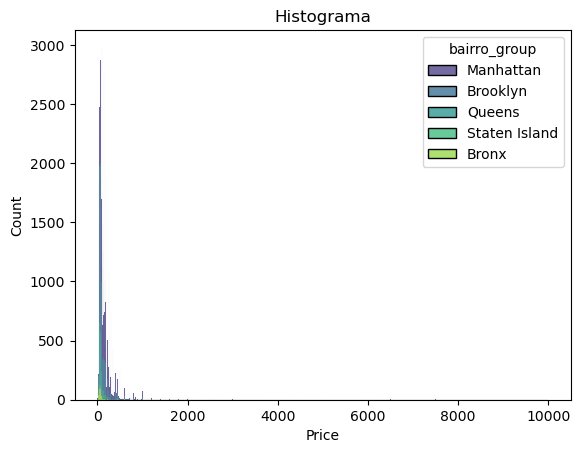

In [9]:
#Histograma student
sns.histplot(data=df, x="price", hue="bairro_group", multiple="stack", palette='viridis')

# Adicionando Título ao gráfico
plt.title("Histograma")
plt.xlabel("Price")
plt.show()

Text(0, 0.5, 'Room Type')

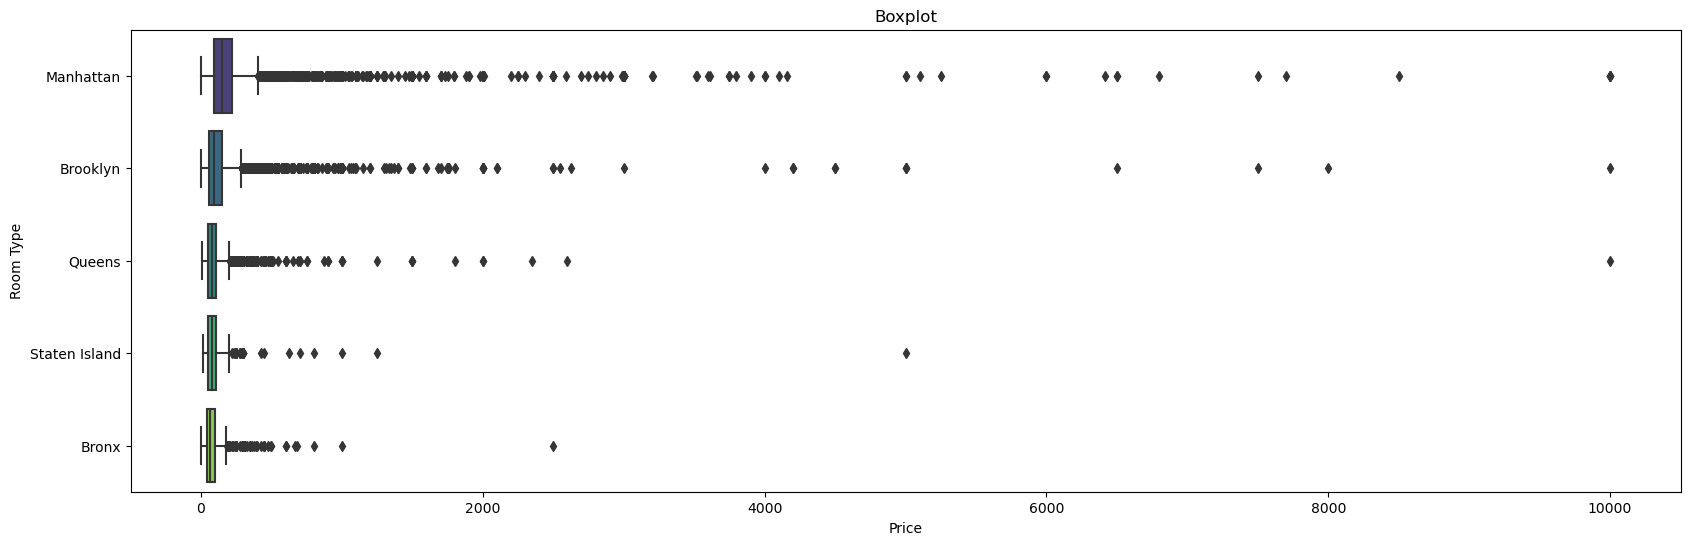

In [10]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(20, 6))
sns.boxplot(x =df['price'], y = df['bairro_group'], data = df, palette='viridis')

# Adicionando Título ao gráfico
plt.title("Boxplot")
plt.xlabel("Price")
plt.ylabel("Room Type")

O histograma da distribuição dos dados da coluna "price" demosntra os dados estão concentradas no começo do gráfico, ou seja, o  maior parte dos valores cobrados são menores 1000. 

O boxplot exibe os inúmeros valores de outliers dos preços considerando o ‘bairro_group’.

In [11]:
#Retirando outliers
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.9 * IQR
      upper_bound = Q3 + 1.3 * IQR
      df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df

,bairro_group,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
3,Manhattan,Entire home/apt,80,10,9,1,0
9,Manhattan,Entire home/apt,135,5,53,1,6
17,Brooklyn,Entire home/apt,99,3,53,1,21
18,Manhattan,Entire home/apt,190,7,0,2,249
19,Brooklyn,Entire home/apt,299,3,9,1,0
...,...,...,...,...,...,...,...
48888,Queens,Private room,65,1,0,2,163
48889,Brooklyn,Private room,70,2,0,2,9
48890,Brooklyn,Private room,40,4,0,2,36
48891,Manhattan,Entire home/apt,115,10,0,1,27


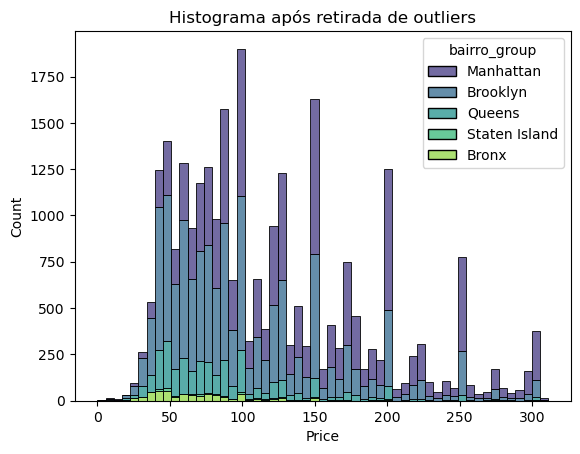

In [12]:
#Histograma após retirada de outliers
sns.histplot(data=df, x="price", hue="bairro_group", multiple="stack", palette='viridis')

# Adicionando Título ao gráfico
plt.title("Histograma após retirada de outliers")
plt.xlabel("Price")
plt.show()

Text(0, 0.5, 'Room Type')

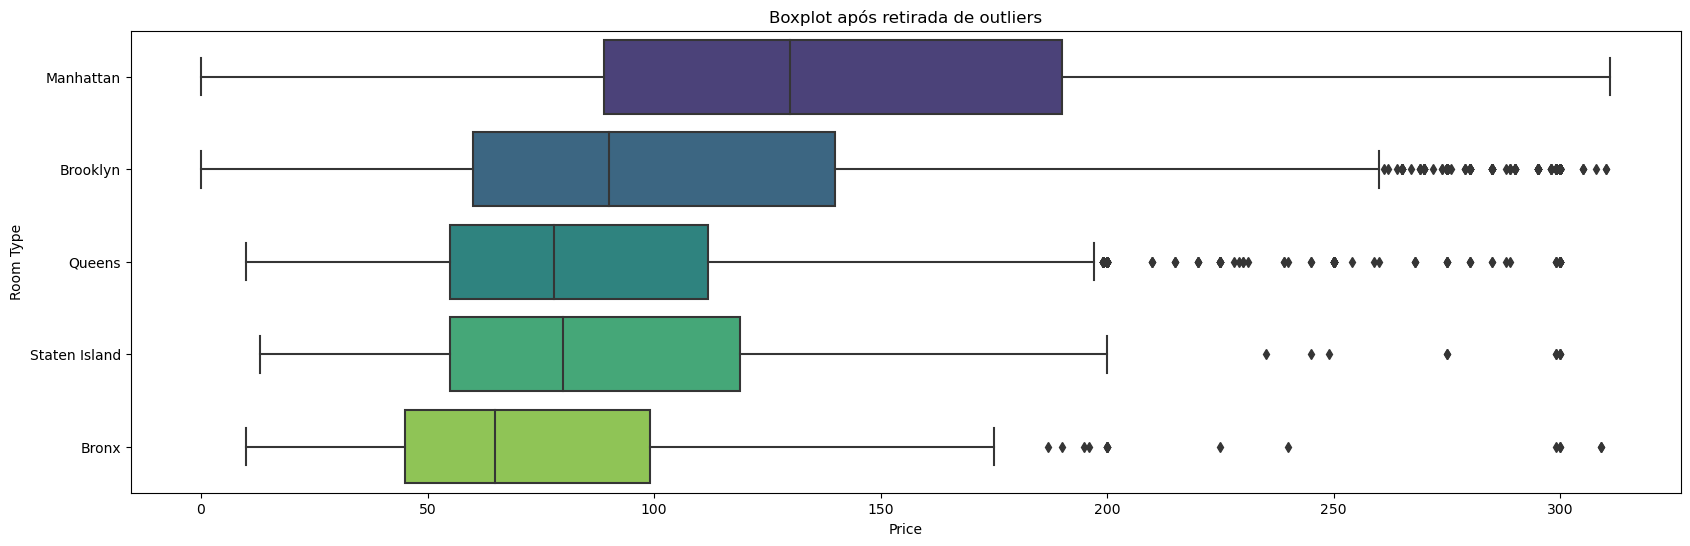

In [13]:
# Tamanho do gráfico
plt.figure(figsize =(20, 6))
sns.boxplot(x =df['price'], y = df['bairro_group'], data = df, palette='viridis')

# Adicionando Título ao gráfico
plt.title("Boxplot após retirada de outliers")
plt.xlabel("Price")
plt.ylabel("Room Type")

In [14]:
#Descrição base de Dados após retirada dos outliers
df.describe()

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,27311.000000,27311.000000,27311.000000,27311.000000,27311.000000
mean,119.320603,2.865439,10.278240,1.236205,37.201128
std,65.097231,1.939250,14.397072,0.529857,62.751504
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,100.000000,2.000000,4.000000,1.000000,0.000000
75%,155.000000,4.000000,14.000000,1.000000,54.000000
max,311.000000,10.000000,65.000000,3.000000,253.000000


In [15]:
#Verificando números de bairros
df[['bairro_group']].value_counts()

bairro_group 
Brooklyn         12184
Manhattan        11640
Queens            2817
Bronx              521
Staten Island      149
dtype: int64

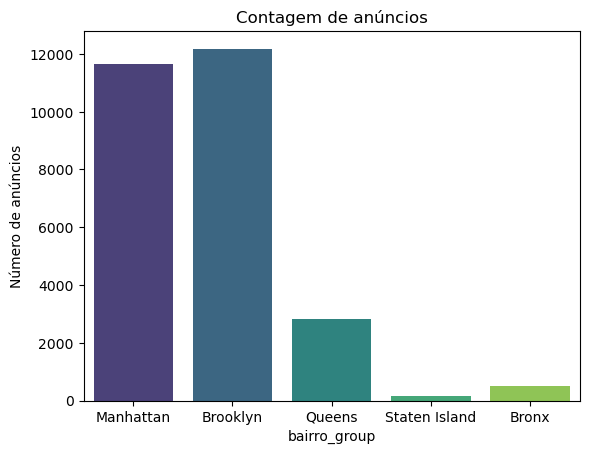

In [16]:
#Contando número de anúncios 
sns.countplot(x='bairro_group', data=df, palette='viridis')
# Adicionando Título ao gráfico
plt.title("Contagem de anúncios");
plt.xlabel("bairro_group");
plt.ylabel("Número de anúncios");

In [17]:
#Calculando a média de preço por bairro_group
media_prices = df.groupby('bairro_group')['price'].mean().reset_index()
media_prices.rename(columns={'price': 'Média'}, inplace=True)
media_prices

,bairro_group,Média
0,Bronx,76.385797
1,Brooklyn,106.119583
2,Manhattan,142.000172
3,Queens,91.725240
4,Staten Island,98.892617


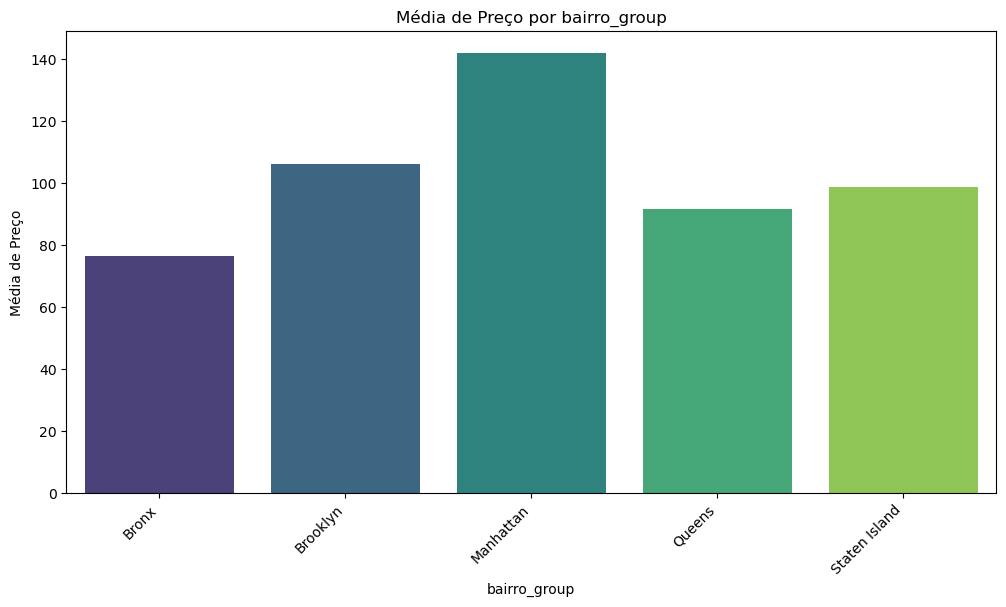

In [18]:
# Plotando o gráfico de média
plt.figure(figsize=(12, 6))
sns.barplot(x='bairro_group', y='Média', data=media_prices, palette='viridis')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('bairro_group')
plt.ylabel('Média de Preço')
plt.title('Média de Preço por bairro_group')
plt.show()

In [19]:
# Calculando o teste de Tukey
tukey_resultados = pairwise_tukeyhsd(df['price'], df['bairro_group'])
# Visualizando os resultados
print(tukey_resultados)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1      group2    meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
    Bronx      Brooklyn  29.7338    0.0  22.1856  37.2819   True
    Bronx     Manhattan  65.6144    0.0   58.059  73.1698   True
    Bronx        Queens  15.3394    0.0   7.2931  23.3858   True
    Bronx Staten Island  22.5068 0.0009   6.8324  38.1813   True
 Brooklyn     Manhattan  35.8806    0.0  33.6938  38.0674   True
 Brooklyn        Queens -14.3943    0.0 -17.9216 -10.8671   True
 Brooklyn Staten Island   -7.227 0.6162 -21.1333   6.6794  False
Manhattan        Queens -50.2749    0.0 -53.8176 -46.7322   True
Manhattan Staten Island -43.1076    0.0 -57.0178 -29.1973   True
   Queens Staten Island   7.1674 0.6415  -7.0155  21.3503  False
----------------------------------------------------------------


De acordo com EDA Manhattan é o local com melhor média de preços.

In [20]:
#Verificando tipos de variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27311 entries, 3 to 48893
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   bairro_group                   27311 non-null  object
 1   room_type                      27311 non-null  object
 2   price                          27311 non-null  int64 
 3   minimo_noites                  27311 non-null  int64 
 4   numero_de_reviews              27311 non-null  int64 
 5   calculado_host_listings_count  27311 non-null  int64 
 6   disponibilidade_365            27311 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.7+ MB


In [21]:
# Utilizando get_dummies
# Com o intuito de considerar as colunas objetos, a transformação para número ocorre via get_dummies

df = pd.concat([df, pd.get_dummies(df['bairro_group'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['room_type'])], axis=1)
df

,bairro_group,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
3,Manhattan,Entire home/apt,80,10,9,1,0,0,0,1,0,0,1,0,0
9,Manhattan,Entire home/apt,135,5,53,1,6,0,0,1,0,0,1,0,0
17,Brooklyn,Entire home/apt,99,3,53,1,21,0,1,0,0,0,1,0,0
18,Manhattan,Entire home/apt,190,7,0,2,249,0,0,1,0,0,1,0,0
19,Brooklyn,Entire home/apt,299,3,9,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,Queens,Private room,65,1,0,2,163,0,0,0,1,0,0,1,0
48889,Brooklyn,Private room,70,2,0,2,9,0,1,0,0,0,0,1,0
48890,Brooklyn,Private room,40,4,0,2,36,0,1,0,0,0,0,1,0
48891,Manhattan,Entire home/apt,115,10,0,1,27,0,0,1,0,0,1,0,0


In [22]:
# Eliminado colunas tipo obejo
df = df.drop(['bairro_group', 'room_type'], axis=1)
df

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
3,80,10,9,1,0,0,0,1,0,0,1,0,0
9,135,5,53,1,6,0,0,1,0,0,1,0,0
17,99,3,53,1,21,0,1,0,0,0,1,0,0
18,190,7,0,2,249,0,0,1,0,0,1,0,0
19,299,3,9,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,65,1,0,2,163,0,0,0,1,0,0,1,0
48889,70,2,0,2,9,0,1,0,0,0,0,1,0
48890,40,4,0,2,36,0,1,0,0,0,0,1,0
48891,115,10,0,1,27,0,0,1,0,0,1,0,0


In [23]:
#Correlação

correlacao = df.corr()
correlacao

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
price,1.000000,0.058777,-0.003659,-0.122303,0.051323,-0.091979,-0.182000,0.300268,-0.143762,-0.023243,0.613052,-0.589479,-0.094925
minimo_noites,0.058777,1.000000,-0.077306,-0.060579,-0.017259,-0.038495,0.041232,0.009976,-0.062635,-0.015111,0.141789,-0.126216,-0.061708
numero_de_reviews,-0.003659,-0.077306,1.000000,0.129424,0.263127,0.020489,-0.019146,-0.008777,0.031652,0.019388,0.036419,-0.033394,-0.012019
calculado_host_listings_count,-0.122303,-0.060579,0.129424,1.000000,0.180541,0.032805,0.020864,-0.070769,0.058304,0.032653,-0.195920,0.186018,0.039641
disponibilidade_365,0.051323,-0.017259,0.263127,0.180541,1.000000,0.077814,-0.032843,-0.064339,0.107254,0.066209,-0.016982,0.014673,0.009135
Bronx,-0.091979,-0.038495,0.020489,0.032805,0.077814,1.000000,-0.125156,-0.120188,-0.047293,-0.010329,-0.042769,0.034539,0.032489
Brooklyn,-0.182000,0.041232,-0.019146,0.020864,-0.032843,-0.125156,1.000000,-0.773476,-0.304356,-0.066471,-0.060581,0.071893,-0.044202
Manhattan,0.300268,0.009976,-0.008777,-0.070769,-0.064339,-0.120188,-0.773476,1.000000,-0.292275,-0.063832,0.113049,-0.117403,0.016673
Queens,-0.143762,-0.062635,0.031652,0.058304,0.107254,-0.047293,-0.304356,-0.292275,1.000000,-0.025117,-0.067135,0.059321,0.030946
Staten Island,-0.023243,-0.015111,0.019388,0.032653,0.066209,-0.010329,-0.066471,-0.063832,-0.025117,1.000000,0.006494,-0.006053,-0.001758


<AxesSubplot:>

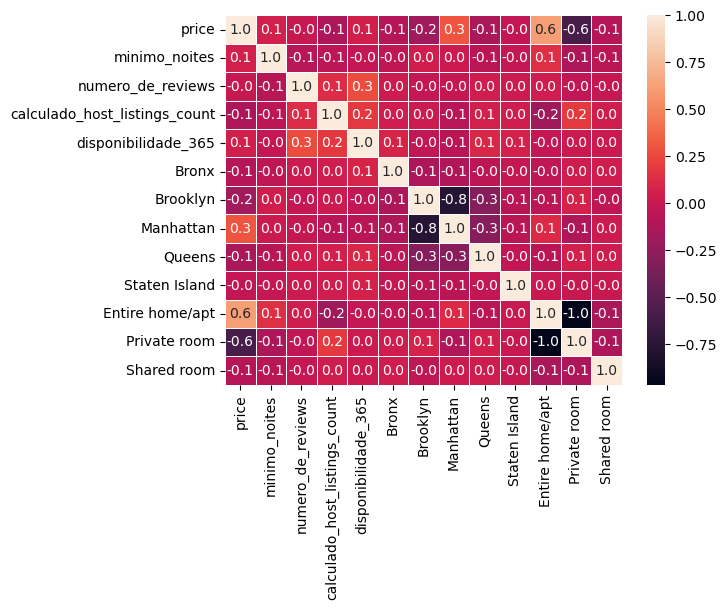

In [24]:
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

Pela figura de correlação as variáveis "minimo_noites" e "disponibilidade_365" apreentam umabaixa correlação com a variável dependente "prie", sendo assim nã interferem significativamente no preço final.


### Modelos
Qul melhor modelo?

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Selecionando as colunas que você deseja escalar (por exemplo, 'coluna1' e 'coluna2')
colunas = ['minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt', 'Private room', 'Shared room']

# Aplicando o MinMaxScaler apenas nas colunas desejadas
df[colunas] = scaler.fit_transform(df[colunas])

# Exibindo o DataFrame após o escalonamento
df

,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
3,80,1.000000,0.138462,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,135,0.444444,0.815385,0.0,0.023715,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
17,99,0.222222,0.815385,0.0,0.083004,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18,190,0.666667,0.000000,0.5,0.984190,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19,299,0.222222,0.138462,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48888,65,0.000000,0.000000,0.5,0.644269,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
48889,70,0.111111,0.000000,0.5,0.035573,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48890,40,0.333333,0.000000,0.5,0.142292,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
48891,115,1.000000,0.000000,0.0,0.106719,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Regressão Linear

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # importando modelo de treino e teste
from sklearn.metrics import r2_score                 # Importando métrica de avaliação Coeficiente de determinação R² 
from mpl_toolkits.mplot3d import axes3d
X = df[[ 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Entire home/apt', 'Private room']].values# Variáveis de entrada
#X = df[[ 'boys', 'girls', 'standLRT']].values       # Variáveis de entrada considerando uma quarta vaiavel
y = df['price'].values                            # Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # Separando em treino e teste

reg = LinearRegression().fit(X_train, y_train)      # Fit
a_coef = reg.coef_                                  # calculando os coeficientes angulares
l_coef = reg.intercept_                             # calculando os coeficiente linear
pred = reg.predict(X_test)                          # Predição
r2_score(y_test, pred)                              # Calculando o coeficiente de determinação

0.44470932796895135

In [27]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

48.03653245036589

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeRegressor
X = df[[ 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Entire home/apt', 'Private room']].values                    # Variáveis de entrada
#X = df[[ 'boys', 'girls', 'standLRT']].values       # Variáveis de entrada considerando uma quarta vaiavel
y = df['price'].values                            # Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # Separando em treino e teste
regressor = DecisionTreeRegressor().fit(X_train, y_train)      # Fit
a_coef = reg.coef_                                  # calculando os coeficientes angulares
l_coef = reg.intercept_                             # calculando os coeficiente linear
pred = reg.predict(X_test)                          # Predição
r2_score(y_test, pred) 

0.4408516429286088

In [29]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

48.78739419833185

### Random Forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
X = df[[ 'minimo_noites', 'numero_de_reviews', 'calculado_host_listings_count', 'disponibilidade_365', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Entire home/apt', 'Private room']].values                    # Variáveis de entrada
#X = df[[ 'boys', 'girls', 'standLRT']].values       # Variáveis de entrada considerando uma quarta vaiavel
y = df['price'].values                            # Alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) # Separando em treino e teste
regressor = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)      # Fit
a_coef = reg.coef_                                  # calculando os coeficientes angulares
l_coef = reg.intercept_                             # calculando os coeficiente linear
pred = reg.predict(X_test)                          # Predição
r2_score(y_test, pred) 

0.4596398295051476

In [31]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, pred))

47.610886232505216

Dos três modelos testados os demelhor desempenho foi o de melhor desenpenho foi a Árvore de Decisão, com um R² = 0,4519 e um RMSE = 47,939